# Preliminary Look at the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from targetandmarket.config import data_folder
sns.set_context("poster", font_scale=0.6)

## Import Data

In [7]:
user_data = pd.read_csv(data_folder/'user_analytics.csv', index_col=0)
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100286 entries, 0 to 100285
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   user_id               100286 non-null  float64
 1   sessions              100286 non-null  float64
 2   last_session          100286 non-null  float64
 3   total_time            100286 non-null  float64
 4   avg_session           100286 non-null  float64
 5   first_open            100286 non-null  float64
 6   continent             100286 non-null  object 
 7   active_days           100286 non-null  int64  
 8   numberOfTransactions  100286 non-null  int64  
 9   holdings              100286 non-null  float64
 10  isPro                 100286 non-null  int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 9.2+ MB


## Exploration

<b>*Note that session numbers and engagement times have been scaled by a hidden factor to obfuscate true values<b>

In [3]:
user_data.describe()

,user_id,sessions,last_session,total_time,avg_session,first_open,active_days,numberOfTransactions,holdings,isPro
count,1.002860e+05,100286.000000,100286.000000,100286.000000,100286.000000,100286.000000,100286.000000,100286.000000,1.002860e+05,100286.000000
mean,1.073570e+09,27.947241,7.739903,2147.228545,63.080886,471.391299,9.868626,181.859691,2.718000e+04,0.034272
std,6.191892e+08,52.917368,8.732004,6549.887578,73.609405,281.759688,10.133758,1531.224663,2.558238e+05,0.181928
min,1.562000e+04,1.000000,0.083335,10.001000,10.001000,31.041667,1.000000,1.000000,1.001104e+01,0.000000
25%,5.371374e+08,2.000000,0.564117,72.896250,25.965083,216.625000,2.000000,7.000000,4.269955e+02,0.000000
50%,1.073040e+09,6.000000,3.612191,271.173500,41.621331,441.520833,5.000000,21.000000,1.908181e+03,0.000000
75%,1.610534e+09,26.000000,13.384272,1270.965500,72.140975,748.458333,17.000000,76.000000,8.622680e+03,0.000000
max,2.147438e+09,537.000000,31.083196,167764.425000,1744.580000,942.958333,31.000000,150646.000000,9.950672e+06,1.000000


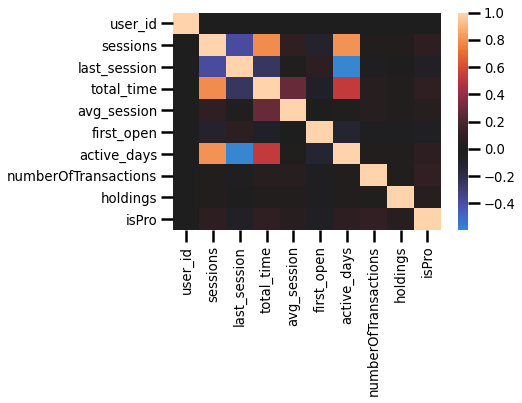

In [6]:
sns.heatmap(user_data.corr(), center=0);

sessions and total_time are significantly correlated. avg_session captures both.
active_days and last_session are also correlated as expect. Only one, the better predictor, will be kept.

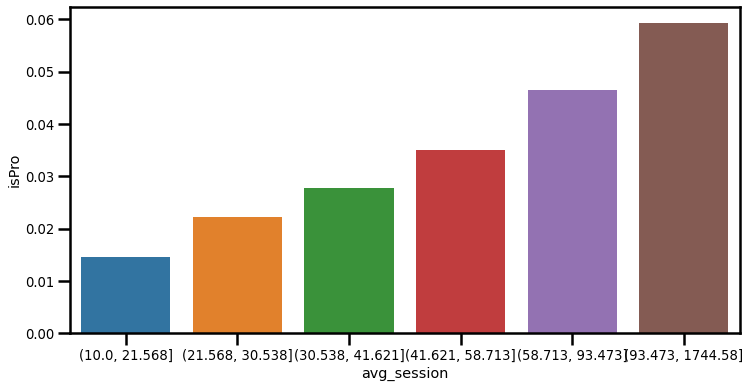

In [34]:
# Ratio of premium users vs Average session time
plt.figure(figsize=(12,6))
sns.barplot(
    x=user_data.groupby(by=pd.qcut(user_data.avg_session, 6)).mean().index,
    y=user_data.groupby(by=pd.qcut(user_data.avg_session, 6)).mean().isPro);

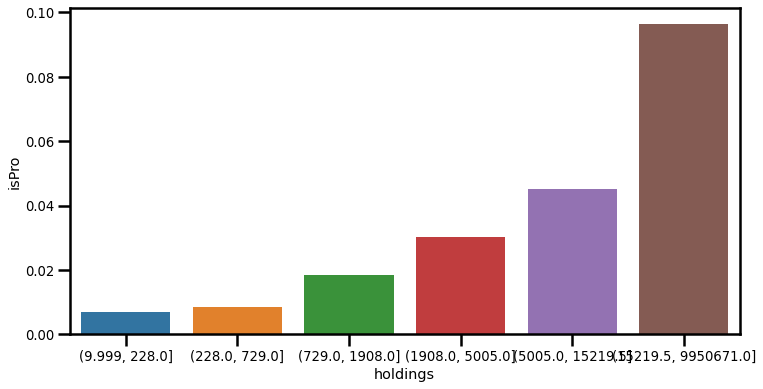

In [35]:
# Ratio of premium users vs Value of investments (holdings)
user_data.loc[:, 'holdings'] = user_data.holdings.astype('int')
plt.figure(figsize=(12,6))
sns.barplot(
    x=user_data.groupby(by=pd.qcut(user_data.holdings, 6)).mean().index,
    y=user_data.groupby(by=pd.qcut(user_data.holdings, 6)).mean().isPro);

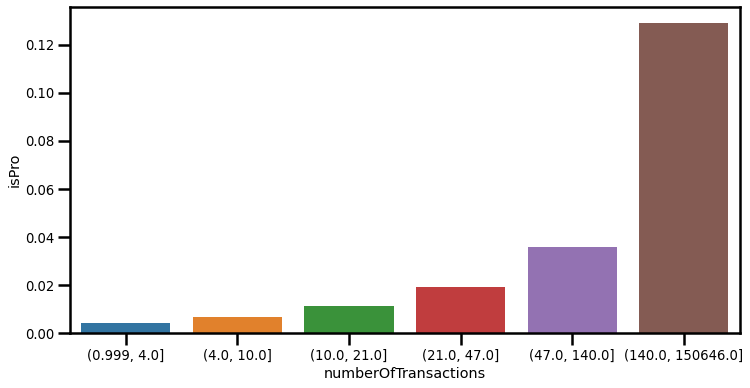

In [36]:
# Ratio of premium users vs Number of transactions
plt.figure(figsize=(12,6))
sns.barplot(
    x=user_data.groupby(by=pd.qcut(user_data.numberOfTransactions, 6)).mean().index,
    y=user_data.groupby(by=pd.qcut(user_data.numberOfTransactions, 6)).mean().isPro);

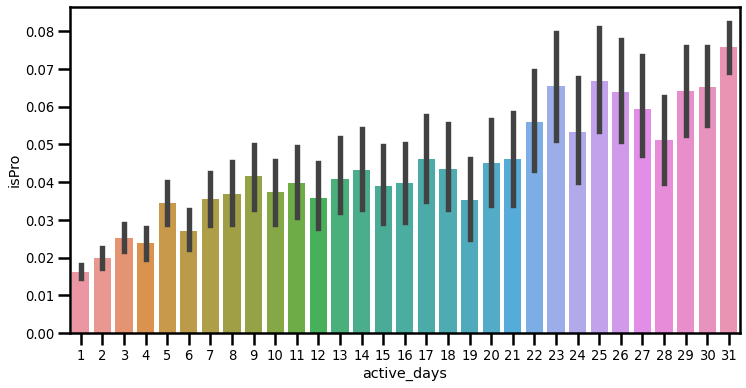

In [32]:
# Ratio of premium users vs Number of active days in May 2020
plt.figure(figsize=(12, 6))
sns.barplot(x='active_days', y='isPro', data=user_data);

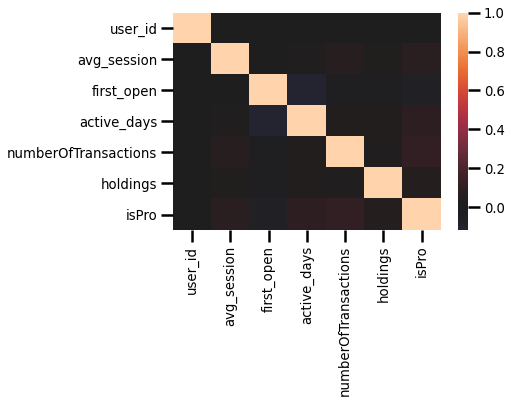

In [41]:
# Selected features
user_data_select = user_data.drop(['sessions', 'total_time', 'last_session'], axis=1)
sns.heatmap(user_data_select.corr(), center=0);